<a name="0"></a> 

# Image Segmentation 

The data for this task comes from Kaggle's Data Science Bowl from 2018 and concists of medical images and corresponding segmentation masks. The purpose of the competition is to build a model that can automatically segment the nuclei out of the images with high performance. When models are fitted in an optimal manner and can make unbiased predictions, this can greatly speed up research for a multitude of diseases by automating nuclei detection. This is important because according to the competition description, a cell's nuclei is the starting point for most analyses. 

* [Dataset/Competition Link](https://www.kaggle.com/c/data-science-bowl-2018)

---

## Models 

* **K-Means Clustering** 
* **U-Net Fully Convolutional Neural Network** 

---

## Notebook Outline 

* [1. Load and Plot Data](#1) 
* [2. K-Means Clustering Segmentation](#2) 
* [3. U-Net Fully Convolutional Network](#3) 
* [4. Summary and Conclusion](#4) 

--- 



In [1]:
import sys 
sys.path.append('../') 

import numpy as np 
import pandas as pd 
from dspML.plot import Nuclei 
from dspML.models.image import unet, kmeans 
from dspML.evaluation import Segmentation 

<a name="1"></a> 

# 1. Load and Plot Data 

* [Outline](#0) 



In [2]:
# train data 
path_train = '../dspML/datasets/nuclei/train_data.npz' 
data = np.load(path_train) 
X_train, y_train = data['images'], data['masks'] 

# test data 
path_test = '../dspML/datasets/nuclei/test_data_1.npz' 
data = np.load(path_test) 
X_test = data['images'] 

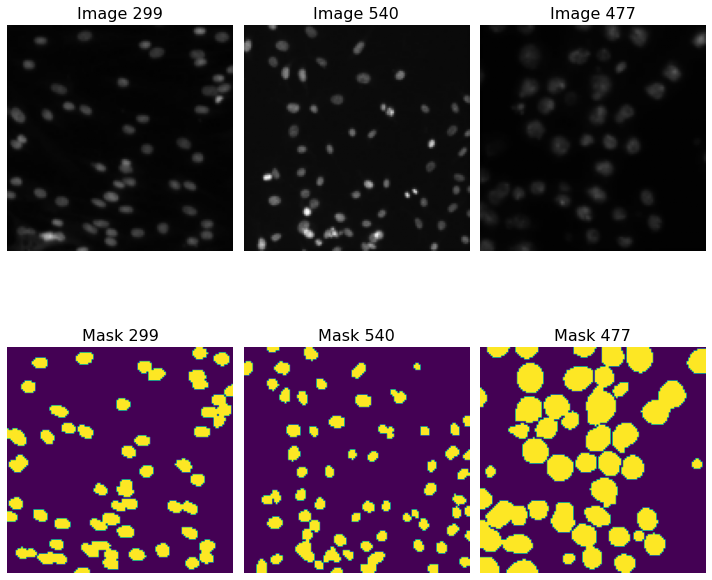

In [3]:
# plot observations 
plot = Nuclei(X_train, y_train, X_test) 
plot.observations() 

<a name="2"></a> 

# 2. K-Means Clustering Segmentation 

* [Outline](#0) 

---

## Define Model 

K-Means clustering is an unsupervised learning method that clusters data points together based on distance. For the task of segmenting nuclei out of medical images, $k=2$ clusters were selected hoping that there will be a cluster for nuclei regions in the images, and another cluster for non-nuclei regions. Once the model is fit, no predictions need to be made since the clusters formed from fitting the model are the predictions for K-Means. 

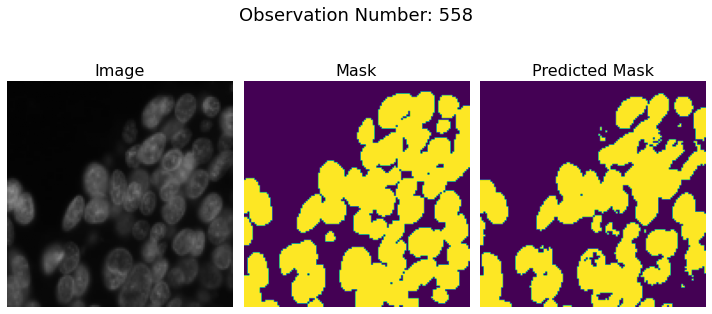

In [4]:
# predict train masks 
km_pmask_train = kmeans.KMeans_segmentation(X_train) 
km_pmask_train = kmeans.reshape_preds(km_pmask_train) 

# plot predicted train masks 
plot.train_predictions(km_pmask_train) 

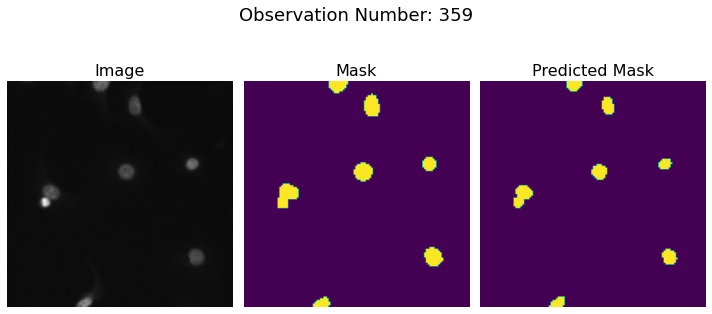

In [5]:
# plot predicted train masks 
plot.train_predictions(km_pmask_train) 

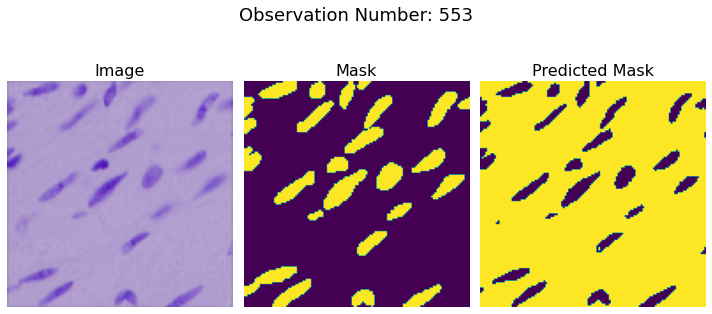

In [6]:
# plot predicted train masks 
plot.train_predictions(km_pmask_train) 

## Evaluate Model 

The DICE coefficient and soft DICE loss will be considered for evaluating both segmentation models since they are generally robust to a high degree of class imbalance since the computation treats every pixel in the prediction and the segmentation mask equally. The DICE coefficient is defined as 

$$
DICE(y, \hat{y}) = \frac{2 \sum_{n}{ y_{i} \hat{y}_{i} } + \epsilon}{\sum_{n}{y_i} + \sum_{n}{\hat{y}_i} + \epsilon}
$$

The soft DICE loss function is similar to the DICE coefficient, defined as 

$$
L(y, \hat{y}) = 1 - \frac{2 \sum_{n}{ y_{i} \hat{y}_{i}}}{ \sum_{n}{y_{i}^{2}} + \sum_{n}{\hat{y}_{i}^{2}} + \epsilon}
$$

In [7]:
km_eval = Segmentation(y_train, km_pmask_train) 
km_eval.DICE() 
km_eval.soft_DICE() 

DICE Coefficient = 0.19037581980228424
Soft DICE Loss = 0.7323713302612305


The DICE coefficient and soft DICE loss for K-Means clustering show very poor performance. One thing to keep in mind is that it is an unsupervised technique, and it is possible that it assigned the masked portion of the segmentations masks to the non-nuclei regions rather than the supervised targets provided. In the plotted predictions, it appears as if K-Means would perform very well. Since there is no control over the predictions other than the number of clusters, K-Means may be a better choice for a less crucial task. 

---

## Test Predictions 

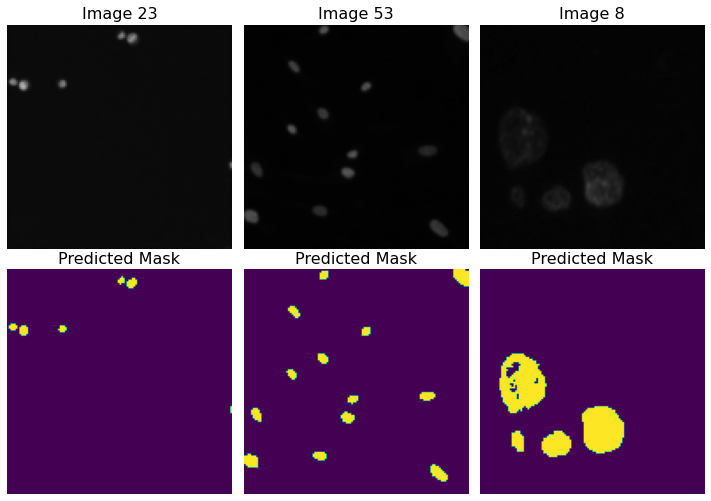

In [8]:
# predicted test masks 
km_preds = kmeans.KMeans_segmentation(X_test) 
km_preds = kmeans.reshape_preds(km_preds) 

# plot test predictions 
plot.test_pred_masks(km_preds) 

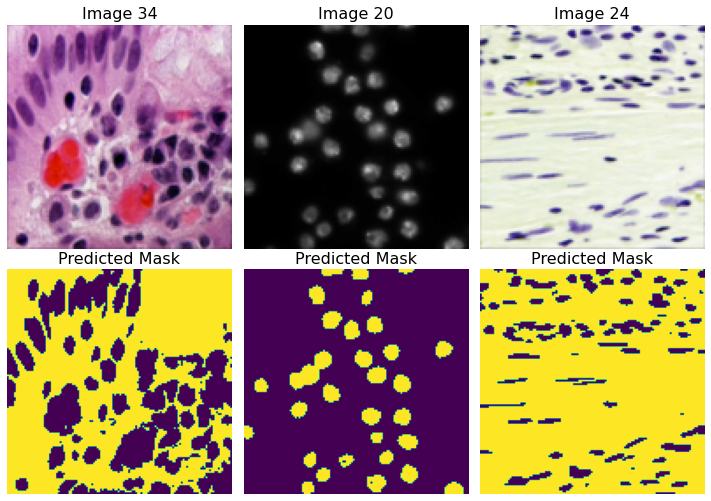

In [9]:
# plot test predictions 
plot.test_pred_masks(km_preds) 

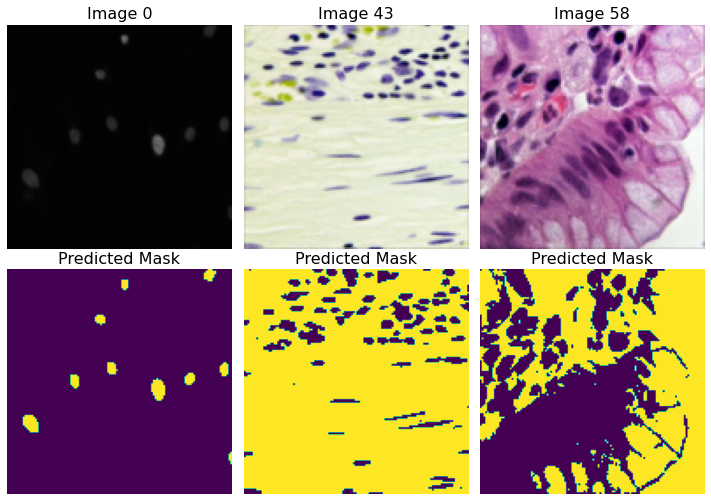

In [10]:
# plot test predictions 
plot.test_pred_masks(km_preds) 

<a name="3"></a> 

# 3. U-Net Fully Convolutional Network 

* [Outline](#0) 

---

## Load Model 

U-Net has a complex architecture with many layers so a pretrained model will be used in this notebook. The model was fit on Google Colab since it offers a free GPU which overall saved a significant amount of time. Each epoch on this laptop was taking around 5-10 minutes compared to about 10-30 seconds on Google Colab. 

In [11]:
# load model 
path = '../dspML/models/image/fitted/unet_fitted_model_2.h5' 
unet = unet.load_uNet(path) 
unet.summary() 

Model: "UNet_Nuclei_Segmentation_Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 128, 128, 64) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 64) 36928       dropout[0][0]                    
_____________________________________________________________________

## Train Predicted Masks 



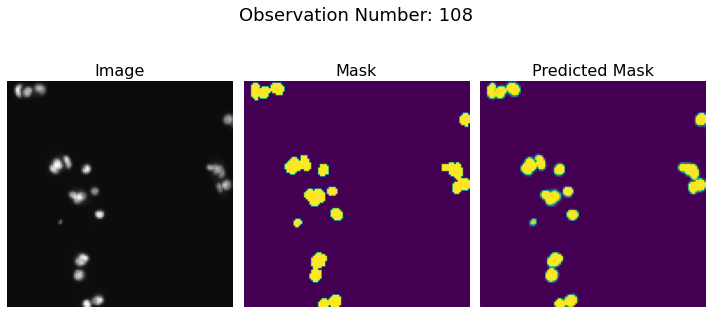

In [12]:
# predicted train masks 
unet_pmask_train = unet.predict(X_train) 

# plot train predictions 
plot.train_predictions(unet_pmask_train) 

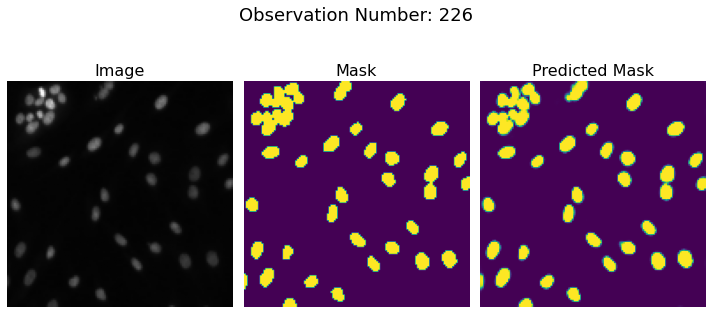

In [13]:
# plot train predictions 
plot.train_predictions(unet_pmask_train) 

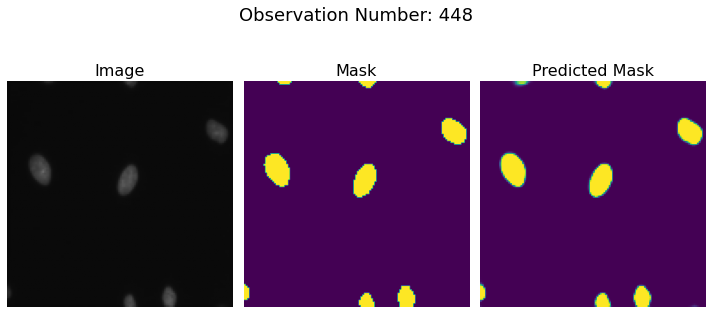

In [14]:
# plot train predictions 
plot.train_predictions(unet_pmask_train) 

## Evaluate Model 



In [15]:
unet_eval = Segmentation(y_train, unet_pmask_train) 
unet_eval.DICE() 
unet_eval.soft_DICE() 

DICE Coefficient = 0.9162023663520813
Soft DICE Loss = 0.04738950729370117


The U-Net plotted predictions appear to be very accurate for the most part. Further, U-Net achieved a soft DICE loss of 0.047 anda DICE coefficient of 0.916 which are very good results. 

--- 

## Test Predictions 

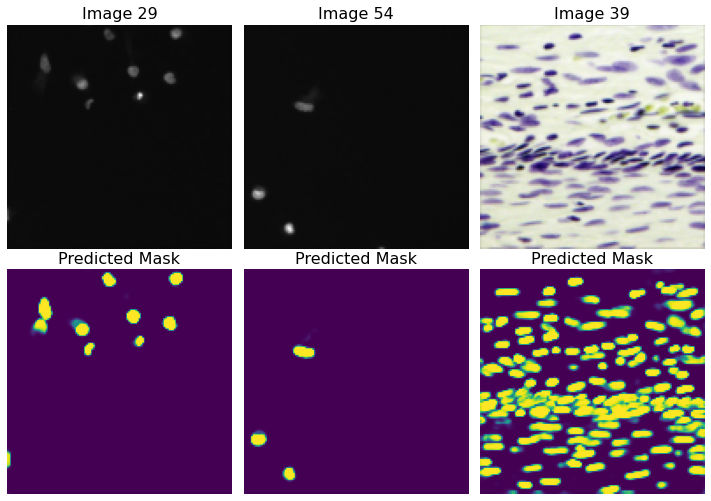

In [16]:
# predict test masks 
unet_preds = unet.predict(X_test) 

# plot test predictions 
plot.test_pred_masks(unet_preds) 

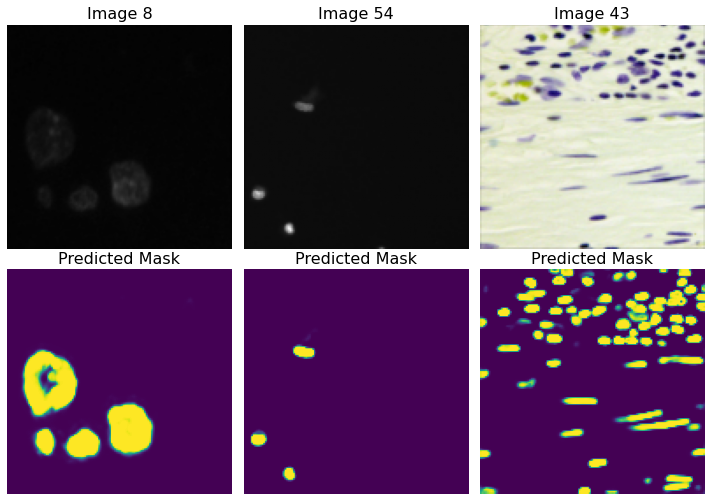

In [17]:
# plot test predictions 
plot.test_pred_masks(unet_preds) 

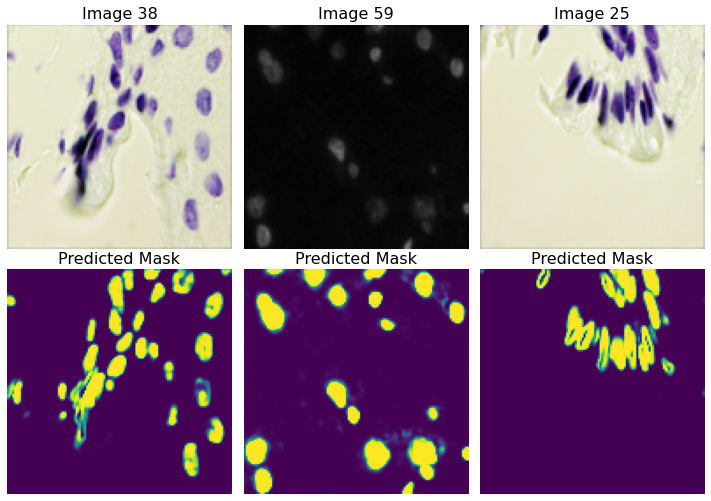

In [18]:
# plot test predictions 
plot.test_pred_masks(unet_preds) 

Based on the DICE coefficient and soft DICE loss, U-Net is by far the better choice of model for this task, although the plotted predictions from K-Means appeared to be very accurate. While there are newer state-of-the-art models currently, U-Net was released in 2015 specifically for biomedical image segmentation and is still a very high performing model even compared to newly designed architectures currently present. 

---

<a name="4"></a> 

# 4. Summary and Conclusion 

[Outline](#0) 

The DICE coefficient and soft DICE loss for both models are summarized in the table below. 

| Model   | DICE   | Soft DICE 
| :----:  | :----: | :----: 
| K-Means | 0.1904 | 0.7324 
| U-Net   | 0.9162 | 0.0474 